<a href="https://colab.research.google.com/github/philip-pearce/randomwalkers_in2stem/blob/main/random_walkers_in2Stem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random walkers**

# **Background**

Consider the motion of particles along one axis. The particles start at
time $t=0$ at position $x=0$ and execute a random walk according to the
following rules:

*   Each particle steps to the right or the left once every $\tau$ seconds, moving a distance $dx_i=\pm \delta$.
*   The probability of going to the right at each step is 1/2, and the
probability of going to the left is 1/2, independently of the previous history.
*   Each particle moves independently of all the other particles,
i.e. the particles do not interact with one another.
*   Particle moves do not depend on the history.

In the code below, we learn how to simulate random walkers. First we need to know how to do certain things in Python.

**Movement of a single walker**

To simulate the movement of a single walker, we will use a *for loop* to move forward through time. These *for loops* allow us to repeat a loop a certain number of times. For example, if we want a loop that prints the integers from 1 to 10 we can use:


In [ ]:
for i in range(1,11):
  print(i)

For each step taken by the walkers, we also need to be able to choose randomly from the available steps: right or left, each with probability 1/2. We can do this using the random.choice function from the numpy package. Try running the code below multiple times, or adding to the list of possible choices:

In [ ]:
import numpy as np
step = np.random.choice([-1,1])
print(step)

Now we are ready to simulate a single random walker. We start by defining the position of the particle, which we choose to be at $x = 0$:

In [69]:
init_position = 0;

We will use a vector to store the particle's position at each time step. We will begin by initialising this vector as a vector full of zeros, using the np.zeros function:

In [70]:
#Choose the number of steps we want to simulate
num_steps = 10;
#Initialise a vector of zeros for the particle's position
position = np.zeros(num_steps);
#set the initial position (defined above) as the first element of the vector
position[0] = init_position;
print(position)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Now we step through time using a for loop, with a random step in each iteration. For simplicity we will use $\tau=1$ for the time between steps, and $\delta = 1$ for the distance of the steps.

In [71]:
for i in range(1,num_steps):
  step = np.random.choice([-1,1])
  position[i] = position[i-1] + step

Finally, we can plot the position of the particle against time:

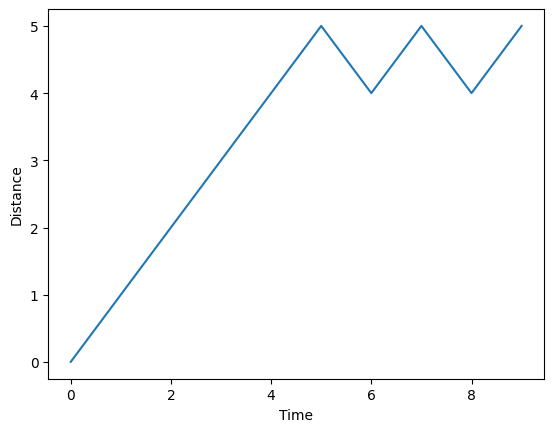

In [72]:
import matplotlib.pyplot as plt
plt.plot(position);
plt.xlabel('Time');
plt.ylabel('Distance');

This type of random walk can be used to model the movement of cells or animals, the pricing of assets, the profit made by a gambler in a game of chance, and many other processes.

**Activities**
1. Using the coding space below, write a *for loop* to generate a Fibonacci sequence, and plot the result. (For the rules to generate a Fibonacci sequence, see https://www.mathsisfun.com/numbers/fibonacci-sequence.html). Which other sequences can you generate?

2. By editing the random walker code above and then running it, simulate the particle for longer, e.g. for 1000 timesteps instead of 10. How many times do you have to run it before your random walk moves a distance of 50 (in the positive direction) from its initial position? Or 100 from its initial position? Have a competition with the person next to you to see who can simulate a particle that moves the furthest. This is like seeing who can make the most money by investing in an asset with a price that fluctuates randomly.

3. Edit the code above to change the initial position of the random walk. Imagine the random walk is simulating a game of heads or tails, where you start with a certain amount of money and gain money when a flipped coin lands on heads, or lose money when it lands on tails. Run the code above for 100 coin flips (which corresponds to taking 100 steps). Did you win money or lose money? Did you lose all your money? How much do you need to start with to be reasonably safe from losing all your money? How would you edit the code so that the gambler invests all their money on each flip, instead of investing a fixed amount on each flip?

3. Edit the code above to include *drift*, i.e. the particle is more likely to go in one direction than the other. This makes the random walk more applicable to the pricing of certain assets. Or you can imagine playing a game of heads or tails with a loaded coin.

4. Combine the codes you've written to generate a sequence that follows a Fibonacci sequence, as well as a random walk; plot your result.

5. Run the code below, which simulates 1000 random walkers. See if you can understand how the code was written, and see if you can explore the effect of drift.

In probability courses at university, you will learn how to write down equations that can answer the questions above without the need for multiple numerical experiments.

# **Coding space**

# **Code for multiple random walkers**

Here is some code to simulate 1000 random walkers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
from IPython import display
from time import sleep

#set parameters
num_particles = 1000;
num_timesteps = 20;
timestep = 1;
starting_position = 0;
move_dist = 1;
#directions that the particle can move: left or right
possible_directions = np.array([-1,1]);

#initialise position vector
position = np.zeros((num_timesteps,num_particles));
for j in range(0,num_particles):
  position[0,j] = starting_position;

#randomly sample the move direction for all timesteps
move_directions = np.random.choice(a = possible_directions,size = [num_timesteps,num_particles])

#loop over timepoints for each particle and solve for position based on movement
for j in range(0,num_particles):
  for i in range(1,num_timesteps):
    position[i,j] = position[i-1,j] + move_dist*move_directions[i,j]


#Plotting individual trajectories

#Plotting histogram
bins = np.linspace(-20, 20, 21)
fig, ax = plt.subplots()
xlimit = [-10,10]
ylimit = [0,0.5]

#Generate plot and update at each timestep
for i in range(1,num_timesteps):
  ax.clear()
  plt.xlim(xlimit[0], xlimit[1])
  plt.ylim(ylimit[0], ylimit[1])
  plt.hist(position[i,:],bins,density=True)
  title_str = '$t = {:.3f}$'.format(i)
  ax.set_title(title_str)
  display.display(plt.gcf())
  display.clear_output(wait=True)
  sleep(0.01)
